<a href="https://colab.research.google.com/github/jmoriwa/ai_agents_workspace/blob/main/Multiple_inputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -U langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 15.6 MB/s eta 0:00:00


In [3]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [5]:
class AgentState(TypedDict):
  values: List[int]
  name: str
  result: str

In [30]:
def process_values(state: AgentState) -> AgentState:
  """This function handles multiple different values"""
  print(state)
  state["result"] = f"Hi there {state['name']}! Your sum = {sum(state['values'])}"
  print(state)
  return state

In [31]:
graph = StateGraph(AgentState)

graph.add_node("processor", process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")

app = graph.compile()

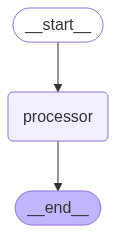

In [32]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [33]:
answers = app.invoke({"values": [1,2,3,4], "name": "Steve"})

{'values': [1, 2, 3, 4], 'name': 'Steve'}
{'values': [1, 2, 3, 4], 'name': 'Steve', 'result': 'Hi there Steve! Your sum = 10'}


In [34]:
print(answers["result"])

Hi there Steve! Your sum = 10
